In [1]:
import tensorflow as tf
print(tf.__version__)

2.2.0


# Validation, regularisation and callbacks

 ## Coding tutorials
 #### [1. Validation sets](#coding_tutorial_1)
 #### [2. Model regularisation](#coding_tutorial_2)
 #### [3. Introduction to callbacks](#coding_tutorial_3)
 #### [4. Early stopping / patience](#coding_tutorial_4)

***
<a id="coding_tutorial_1"></a>
## Validation sets

#### Load the data

In [2]:
# Load the diabetes dataset

from sklearn.datasets import load_diabetes

diabetes_dataset = load_diabetes()
print(diabetes_dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [3]:
# Save the input and target variables

data = diabetes_dataset["data"]
targets = diabetes_dataset["target"]

In [4]:
# Normalise the target data (this will make clearer training curves)

targets = (targets - targets.mean(axis=0)) / targets.std()
targets

array([-1.47194752e-02, -1.00165882e+00, -1.44579915e-01,  6.99512942e-01,
       -2.22496178e-01, -7.15965848e-01, -1.83538046e-01, -1.15749134e+00,
       -5.47147277e-01,  2.05006151e+00, -6.64021672e-01, -1.07957508e+00,
        3.48889755e-01,  4.26806019e-01, -4.43258925e-01,  2.45001404e-01,
        1.80071184e-01, -1.05621783e-01, -7.15965848e-01,  2.06043272e-01,
       -1.09256112e+00, -1.33929596e+00, -1.09256112e+00,  1.20596866e+00,
        4.13819975e-01,  6.47568766e-01, -1.96524090e-01, -8.71798376e-01,
       -2.74440354e-01,  1.69943833e+00, -3.00412442e-01, -1.20943552e+00,
        2.45262887e+00, -8.45826288e-01, -1.13151925e+00, -6.51035629e-01,
        1.46568953e+00,  1.60853602e+00,  1.29687096e+00, -8.06868156e-01,
       -6.77007716e-01, -1.26137969e+00, -1.18346343e+00, -7.80896068e-01,
        1.38777327e+00, -1.28735178e+00,  4.91736239e-01, -1.31593871e-01,
       -1.00165882e+00, -1.31593871e-01,  3.72247006e-02,  9.46247777e-01,
       -1.20943552e+00, -

In [5]:
# Split the data into train and test sets

from sklearn.model_selection import train_test_split

train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size=0.1)

print(train_data.shape)
print(test_data.shape)
print(train_targets.shape)
print(test_targets.shape)

(397, 10)
(45, 10)
(397,)
(45,)


#### Train a feedforward neural network model

In [6]:
# Build the model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def get_model():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(train_data.shape[1],)),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(1)
    ])
    
    return model

model = get_model()

In [7]:
# Print the model summary

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1408      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1

In [8]:
# Compile the model

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [9]:
# Train the model, with some of the data reserved for validation

history = model.fit(train_data, train_targets, epochs=100, validation_split=0.15, batch_size=64, verbose=2)

Epoch 1/100
6/6 - 0s - loss: 0.9719 - mae: 0.8428 - val_loss: 0.9703 - val_mae: 0.8505
Epoch 2/100
6/6 - 0s - loss: 0.8999 - mae: 0.8117 - val_loss: 0.8186 - val_mae: 0.7856
Epoch 3/100
6/6 - 0s - loss: 0.7118 - mae: 0.7173 - val_loss: 0.5816 - val_mae: 0.6533
Epoch 4/100
6/6 - 0s - loss: 0.5690 - mae: 0.6285 - val_loss: 0.6112 - val_mae: 0.6422
Epoch 5/100
6/6 - 0s - loss: 0.5598 - mae: 0.5865 - val_loss: 0.6329 - val_mae: 0.6234
Epoch 6/100
6/6 - 0s - loss: 0.5116 - mae: 0.5931 - val_loss: 0.5645 - val_mae: 0.6459
Epoch 7/100
6/6 - 0s - loss: 0.4835 - mae: 0.5699 - val_loss: 0.5745 - val_mae: 0.6039
Epoch 8/100
6/6 - 0s - loss: 0.4624 - mae: 0.5594 - val_loss: 0.5484 - val_mae: 0.5941
Epoch 9/100
6/6 - 0s - loss: 0.4454 - mae: 0.5432 - val_loss: 0.5370 - val_mae: 0.5786
Epoch 10/100
6/6 - 0s - loss: 0.4310 - mae: 0.5331 - val_loss: 0.5200 - val_mae: 0.5809
Epoch 11/100
6/6 - 0s - loss: 0.4328 - mae: 0.5317 - val_loss: 0.5223 - val_mae: 0.5741
Epoch 12/100
6/6 - 0s - loss: 0.4467 - ma

Epoch 95/100
6/6 - 0s - loss: 0.0380 - mae: 0.1473 - val_loss: 0.7946 - val_mae: 0.6857
Epoch 96/100
6/6 - 0s - loss: 0.0515 - mae: 0.1724 - val_loss: 0.8581 - val_mae: 0.7247
Epoch 97/100
6/6 - 0s - loss: 0.0381 - mae: 0.1447 - val_loss: 0.8000 - val_mae: 0.6914
Epoch 98/100
6/6 - 0s - loss: 0.0434 - mae: 0.1604 - val_loss: 0.8174 - val_mae: 0.6810
Epoch 99/100
6/6 - 0s - loss: 0.0516 - mae: 0.1789 - val_loss: 0.8274 - val_mae: 0.6813
Epoch 100/100
6/6 - 0s - loss: 0.0582 - mae: 0.1921 - val_loss: 0.9365 - val_mae: 0.7089


In [10]:
# Evaluate the model on the test set

model.evaluate(test_data, test_targets, verbose=2)

2/2 - 0s - loss: 0.8501 - mae: 0.7248


[0.8500961065292358, 0.7248304486274719]

#### Plot the learning curves

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

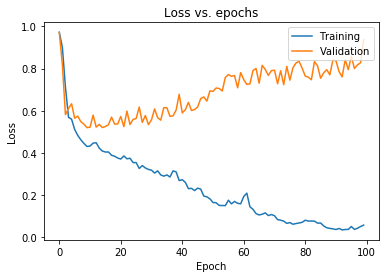

In [12]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_2"></a>
## Model regularisation

#### Adding regularisation with weight decay and dropout

In [13]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [14]:
def get_regularized_model(wd, rate):
    model = Sequential([
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu', input_shape=(train_data.shape[1],)),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu'),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu'),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu'),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu'),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu'),
        Dropout(rate),
        Dense(1)
    ])
    
    return model

In [15]:
# Re-build the model with weight decay and dropout layers
model = get_regularized_model(1e-5, 0.3)

In [16]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [17]:
# Train the model, with some of the data reserved for validation
history = model.fit(train_data, train_targets, epochs=100, validation_split=0.15, batch_size=64, verbose=2)

Epoch 1/100
6/6 - 0s - loss: 0.9856 - mae: 0.8427 - val_loss: 1.0093 - val_mae: 0.8641
Epoch 2/100
6/6 - 0s - loss: 0.9715 - mae: 0.8371 - val_loss: 0.9600 - val_mae: 0.8430
Epoch 3/100
6/6 - 0s - loss: 0.9173 - mae: 0.8153 - val_loss: 0.8414 - val_mae: 0.7948
Epoch 4/100
6/6 - 0s - loss: 0.7836 - mae: 0.7422 - val_loss: 0.6651 - val_mae: 0.7107
Epoch 5/100
6/6 - 0s - loss: 0.6448 - mae: 0.6653 - val_loss: 0.5684 - val_mae: 0.6112
Epoch 6/100
6/6 - 0s - loss: 0.6447 - mae: 0.6442 - val_loss: 0.5805 - val_mae: 0.5982
Epoch 7/100
6/6 - 0s - loss: 0.5650 - mae: 0.6042 - val_loss: 0.6031 - val_mae: 0.6661
Epoch 8/100
6/6 - 0s - loss: 0.5547 - mae: 0.6055 - val_loss: 0.6122 - val_mae: 0.6710
Epoch 9/100
6/6 - 0s - loss: 0.5713 - mae: 0.6299 - val_loss: 0.6188 - val_mae: 0.6487
Epoch 10/100
6/6 - 0s - loss: 0.5622 - mae: 0.6174 - val_loss: 0.6149 - val_mae: 0.6488
Epoch 11/100
6/6 - 0s - loss: 0.5410 - mae: 0.5981 - val_loss: 0.6070 - val_mae: 0.6321
Epoch 12/100
6/6 - 0s - loss: 0.5443 - ma

Epoch 95/100
6/6 - 0s - loss: 0.3889 - mae: 0.5119 - val_loss: 0.6253 - val_mae: 0.6131
Epoch 96/100
6/6 - 0s - loss: 0.3869 - mae: 0.5105 - val_loss: 0.6295 - val_mae: 0.6082
Epoch 97/100
6/6 - 0s - loss: 0.3730 - mae: 0.4808 - val_loss: 0.6013 - val_mae: 0.6051
Epoch 98/100
6/6 - 0s - loss: 0.3677 - mae: 0.4894 - val_loss: 0.5889 - val_mae: 0.5886
Epoch 99/100
6/6 - 0s - loss: 0.3816 - mae: 0.5005 - val_loss: 0.5877 - val_mae: 0.5840
Epoch 100/100
6/6 - 0s - loss: 0.3592 - mae: 0.4802 - val_loss: 0.5886 - val_mae: 0.5859


In [18]:
# Evaluate the model on the test set
model.evaluate(test_data, test_targets, verbose=2)

2/2 - 0s - loss: 0.5931 - mae: 0.5525


[0.5930768251419067, 0.5525125861167908]

#### Plot the learning curves

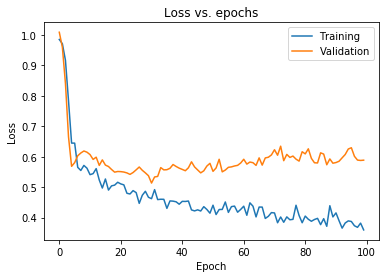

In [19]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_3"></a>
## Introduction to callbacks

#### Example training callback

In [20]:
# Write a custom callback

from tensorflow.keras.callbacks import Callback

class TrainingCallback(Callback):
    
    def on_train_begin(self, logs=None):
        print('Starting Training...')
        
    def on_epoch_begin(selg, epoch, logs=None):
        print(f'Starting Epoch {epoch}')
        
    def on_train_batch_begin(self, batch, logs=None):
        print(f'Training: Starting batch {batch}')
        
    def on_train_batch_end(self, batch, logs=None):
        print(f'Training Finished batch {batch}')
        
    def on_epoch_end(self, epoch, logs=None):
        print(f'Finished epoch {epoch}')
        
    def on_train_end(self, logs=None):
        print('Training Finished...')

In [21]:
# Re-build the model

model = get_regularized_model(1e-5, 0.3)

In [22]:
# Compile the model

model.compile(optimizer='adam', loss='mae')

#### Train the model with the callback

In [24]:
# Train the model, with some of the data reserved for validation

model.fit(train_data, train_targets, epochs=3, batch_size=128, verbose=False, callbacks=[TrainingCallback()])

Starting Training...
Starting Epoch 0
Training: Starting batch 0
Training Finished batch 0
Training: Starting batch 1
Training Finished batch 1
Training: Starting batch 2
Training Finished batch 2
Training: Starting batch 3
Training Finished batch 3
Finished epoch 0
Starting Epoch 1
Training: Starting batch 0
Training Finished batch 0
Training: Starting batch 1
Training Finished batch 1
Training: Starting batch 2
Training Finished batch 2
Training: Starting batch 3
Training Finished batch 3
Finished epoch 1
Starting Epoch 2
Training: Starting batch 0
Training Finished batch 0
Training: Starting batch 1
Training Finished batch 1
Training: Starting batch 2
Training Finished batch 2
Training: Starting batch 3
Training Finished batch 3
Finished epoch 2
Training Finished...


In [25]:
# Evaluate the model

model.evaluate(test_data, test_targets)

2/2 [==============================] - 0s 0s/step - loss: 0.8852


0.8852219581604004

In [26]:
# Make predictions with the model

model.predict(test_data, verbose=False)

array([[-0.14475821],
       [-0.1162711 ],
       [-0.15827723],
       [-0.10954391],
       [-0.17448135],
       [-0.1610864 ],
       [-0.19931594],
       [-0.13903499],
       [-0.15777865],
       [-0.11235895],
       [-0.09535206],
       [-0.13575129],
       [-0.16292837],
       [-0.12524027],
       [-0.11459959],
       [-0.14101005],
       [-0.1405041 ],
       [-0.14869945],
       [-0.12858817],
       [-0.18416364],
       [-0.13896872],
       [-0.1756018 ],
       [-0.11468788],
       [-0.1846023 ],
       [-0.1414244 ],
       [-0.1661603 ],
       [-0.12001605],
       [-0.12365804],
       [-0.19669345],
       [-0.1180684 ],
       [-0.1624778 ],
       [-0.09990608],
       [-0.14401878],
       [-0.10882281],
       [-0.18780993],
       [-0.14383982],
       [-0.11803835],
       [-0.15442915],
       [-0.18958764],
       [-0.0950246 ],
       [-0.13196531],
       [-0.1929922 ],
       [-0.14820193],
       [-0.12005615],
       [-0.16148363]], dtype=flo

***
<a id="coding_tutorial_4"></a>
## Early stopping / patience

#### Re-train the models with early stopping

In [ ]:
# Re-train the unregularised model



In [ ]:
# Evaluate the model on the test set



In [ ]:
# Re-train the regularised model



In [ ]:
# Evaluate the model on the test set



#### Plot the learning curves

In [ ]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 5))

fig.add_subplot(121)

plt.plot(unreg_history.history['loss'])
plt.plot(unreg_history.history['val_loss'])
plt.title('Unregularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

fig.add_subplot(122)

plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title('Regularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.show()